# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
# Your code here
Z = np.zeros((3, 4), dtype = int)
print(Z)
D = np.diag((1, 2, 3, 4, 5))
print(D)
tr = np.trace(D)
print(tr)
I = sla.inv(D)
print(I)
X = np.random.rand(4,5)
print(X)
m = X[np.ix_([1, 2], [0, 1])]
print(m)
det = sla.det(m)
print(det)
T = X.T
mul = T.dot(X)
print(T, mul)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
15
[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]
[[0.25845555 0.79815737 0.75766137 0.71110516 0.15681217]
 [0.53824753 0.81705024 0.23219316 0.36169466 0.61863761]
 [0.80607247 0.54767916 0.28863993 0.60995483 0.15572676]
 [0.28804117 0.14127654 0.62491204 0.46049482 0.65225642]]
[[0.53824753 0.81705024]
 [0.80607247 0.54767916]]
-0.36381475078230285
[[0.25845555 0.53824753 0.80607247 0.28804117]
 [0.79815737 0.81705024 0.54767916 0.14127654]
 [0.75766137 0.23219316 0.28863993 0.62491204]
 [0.71110516 0.36169466 0.60995483 0.46049482]
 [0.15681217 0.61863761 0.15572676 0.65225642]] [[1.08923023 1.12822603 0.73346427 1.002

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
import numpy as np
import functools
def my_det(matrix: np):
    swap = 0
    num_rows = matrix.shape[0]
    num_col = matrix.shape[1]
    if num_col != num_rows:
        raise ValueError
    for i in range(num_rows):
        if matrix[i][i] == 0.0:
            row_not_zero = i + 1
            while row_not_zero < num_rows and matrix[row_not_zero][i] == 0.0:
                swap += 1
                row_not_zero += 1
            if row_not_zero < num_rows:
                l = matrix[i].copy()
                matrix[i] = matrix[row_not_zero]
                matrix[row_not_zero] = l
            if row_not_zero >= num_rows:
                return 0
        for j in range(i + 1, num_rows):
            res = np.array(matrix[j]) - (np.array(matrix[i]) * matrix[j][i])/matrix[i][i]
            matrix[j] = list(res)
    det = functools.reduce(lambda x,y: x*y, matrix.diagonal()) * (-1)**swap
    return det
n = np.random.rand(7,7)
print(n)
print(my_det(n), sla.det(n))


[[0.41611824 0.12211389 0.51229414 0.07946364 0.97018073 0.61993812
  0.7562225 ]
 [0.23501907 0.47713895 0.19690937 0.94692665 0.44749041 0.23276958
  0.76160039]
 [0.74295305 0.01859388 0.77998049 0.96833164 0.4793318  0.17461955
  0.19301556]
 [0.16977553 0.85207431 0.33068987 0.10012925 0.49175952 0.90993681
  0.73661216]
 [0.52736377 0.35531609 0.21674703 0.74930594 0.18762175 0.31371013
  0.23695867]
 [0.80330125 0.15001745 0.88320582 0.29523658 0.13291351 0.75141056
  0.24798632]
 [0.30529828 0.34373836 0.65442922 0.8628162  0.53440402 0.5392597
  0.37884577]]
-0.027875403175740828 -0.02787540317574089


Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(50, 50)
    if np.abs(my_det(np.asarray(X, np.float128)) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

13.3 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
324 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
180 µs ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
66.5 ms ± 5.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
41.5 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars


32.2 s ± 2.18 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


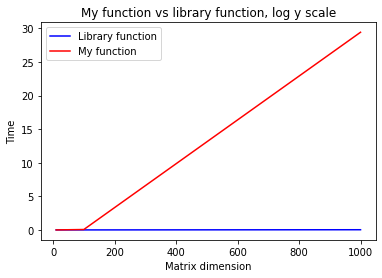

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()


У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

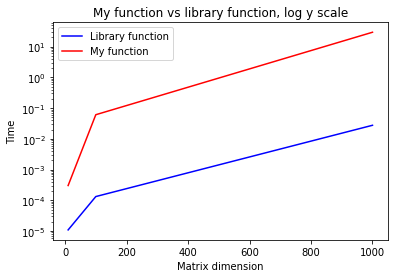

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
# Your code here
A = np.array([[1, 0], [10**20, 1]])
B = np.array([[10**(-20), 1], [0, 1-10**20]])
print(A.dot(B))
C = np.array([[1., 0.], [10.**20, 1.]])
D = np.array([[10.**(-20), 1.], [0., 1.-10.**20]])
print(C.dot(D))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**
первый, проблема с точностью float





**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [1]:
import numpy as np
def Bin_coef(n, k):
    p = 1
    q = 1
    for i in range(1, k + 1):
        q *= i
    for i in range(n - k + 1, n + 1):
        p *= i
    return (p, q)


def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            p, q = Bin_coef(i+j, i)
            P[i, j] = p/q
    return P
print(my_pascal(4))

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00 7.000e+00
  8.000e+00 9.000e+00 1.000e+01]
 [1.000e+00 3.000e+00 6.000e+00 1.000e+01 1.500e+01 2.100e+01 2.800e+01
  3.600e+01 4.500e+01 5.500e+01]
 [1.000e+00 4.000e+00 1.000e+01 2.000e+01 3.500e+01 5.600e+01 8.400e+01
  1.200e+02 1.650e+02 2.200e+02]
 [1.000e+00 5.000e+00 1.500e+01 3.500e+01 7.000e+01 1.260e+02 2.100e+02
  3.300e+02 4.950e+02 7.150e+02]
 [1.000e+00 6.000e+00 2.100e+01 5.600e+01 1.260e+02 2.520e+02 4.620e+02
  7.920e+02 1.287e+03 2.002e+03]
 [1.000e+00 7.000e+00 2.800e+01 8.400e+01 2.100e+02 4.620e+02 9.240e+02
  1.716e+03 3.003e+03 5.005e+03]
 [1.000e+00 8.000e+00 3.600e+01 1.200e+02 3.300e+02 7.920e+02 1.716e+03
  3.432e+03 6.435e+03 1.144e+04]
 [1.000e+00 9.000e+00 4.500e+01 1.650e+02 4.950e+02 1.287e+03 3.003e+03
  6.435e+03 1.287e+04 2.431e+04]
 [1.000e+00 1.000e+01 5.500e+01 2.200e+02 7.150e+02 2.0

Чему равен её определитель? **Строго** поясните свой ответ.

----
**Ваше решение**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [4]:
# Your code here
print(sla.det(my_pascal(30)))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
# Your code h
def prod_and_sq_sum(A):
    prod = A.diagonal().prod()
    sq_sum = np.multiply(A.diagonal(), A.diagonal()).sum()
    return prod, sq_sum


passed


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
# Your code here

def f(A, B, lmbd, k):
    n = A.shape[1]
    size = min(k, n)
    a = A[:, :size]
    a *= lmbd[:size].reshape((1, size))
    b = B[:, :size]
    return a.dot(b.T)


passed


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [ ]:
# Your code here
def get_diag(A, B):
    mul = (A * B.T).sum(axis=1)
    return np.array(mul)


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [3]:
import math

def shrink_rotate(x, a, coef=1., angle=0.):
    rotate_vec = 1j ** (angle / (math.pi / 2))
    vec = coef * (x - a) * rotate_vec
    return vec + a
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    c = shrink_rotate(x, a, coef=1., angle=0.)
    return c.conjugate()
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    return a + (r ** 2 / (x - a))
    raise NotImplementedError()

**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

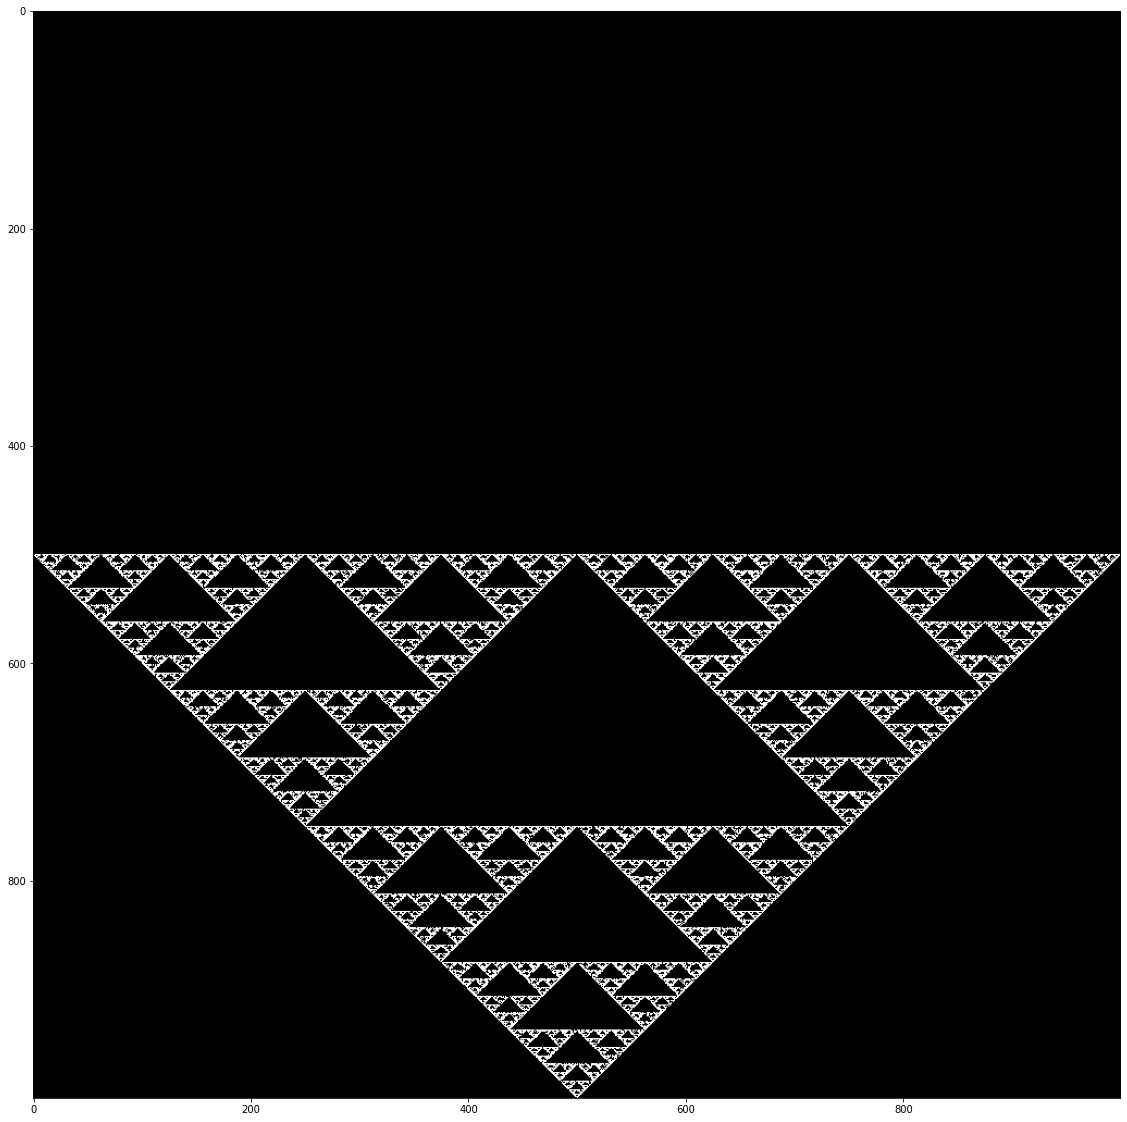

In [22]:
# Your code here
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

pix_mat = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        pix_mat[int(500 * np.imag(z) + 500)][int(500 * np.real(z) + 500)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pix_mat, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.
Получили фигуру - треугольник Серпинского с вершинами в точках (500, 0), (0, 500), (500, 1000). 
В результате работы функции мы итеративно смещаемся в сторону одного из углов, но на половину пути.
Середины сторон треугольника соединяются отрезками. Получаются 4 новых треугольника. Из исходного треугольника удаляется внутренность срединного треугольника. Получается множество состоящее из 3 оставшихся треугольников. Далее продолжая этот процесс много раз получаем данную фигуру.

---
Ваше объяснение

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

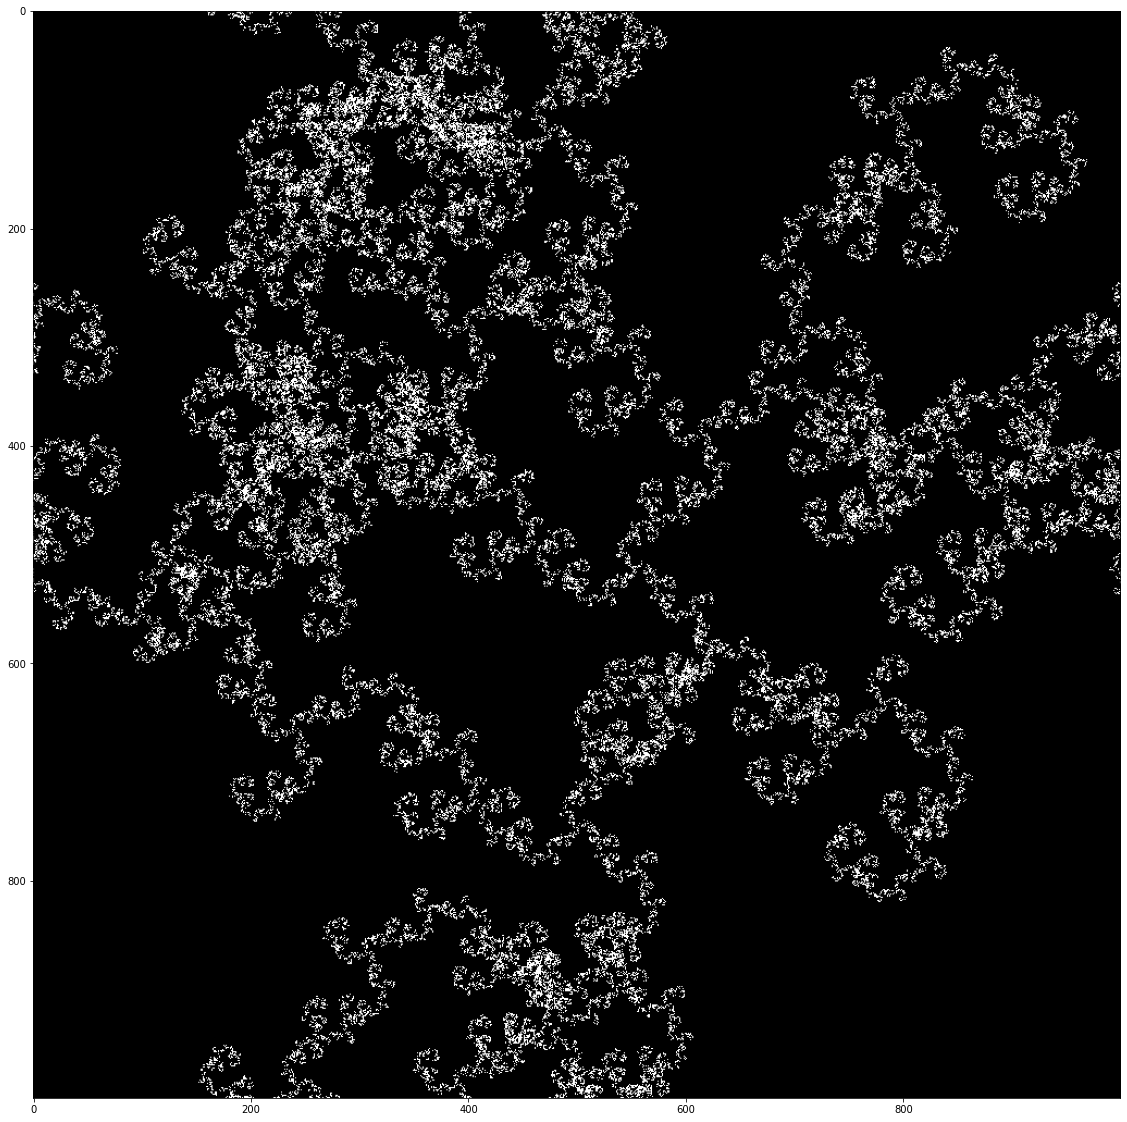

In [20]:
# Your code here
z = 1.3 + 3.8*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.5)),
    (lambda t: shrink_rotate(t, 1. - 0.5*1j, coef=0.5, angle=8.)),
    (lambda t: shrink_rotate(t, -1 + 0.*1j, coef=0.5, angle=8.))
]

pix_mat = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        pix_mat[int(500 * np.imag(z))][int(500 * np.real(z))] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pix_mat, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [ ]:
# Your code here


37.4 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
40.1 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70.9 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
129 µs ± 43.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
226 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
400 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
965 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.07 ms ± 70.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.39 ms ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.2 ms ± 696 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
40.3 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
134 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


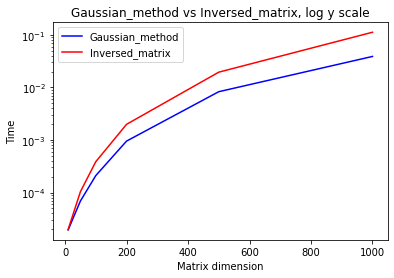

In [23]:
# Запустите этот блок кода
gaussian_times_1 = []
inversed_times_1 = []
m_fixed = 10
n = [10, 50, 100, 200, 500, 1000]

for N in n:
    A = np.random.rand(N, N)
    B = np.random.rand(N, m_fixed)
    gaussian_time = %timeit -o np.linalg.solve(A, B)
    gaussian_times_1.append(gaussian_time.best)
    inversed_time = %timeit -o np.linalg.inv(A)@B
    inversed_times_1.append(inversed_time.best)  

plt.semilogy(n, gaussian_times_1, color='blue', label='Gaussian_method')
plt.semilogy(n, inversed_times_1, color='red', label='Inversed_matrix')
plt.title('Gaussian_method vs Inversed_matrix, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

146 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
268 µs ± 6.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
263 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
354 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
806 µs ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
639 µs ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.41 ms ± 37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
918 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.88 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.52 ms ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.08 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.56 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.8 ms ± 515 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.19 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops ea

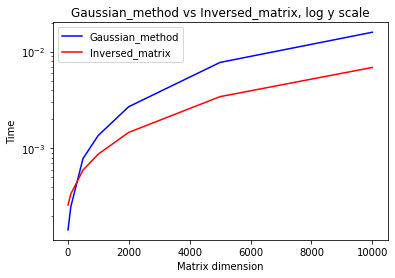

In [ ]:
gaussian_times_2 = []
inversed_times_2 = []
n_fixed = 100
m = [10, 100, 500, 1000, 2000, 5000, 10000]

for M in m:
    A = np.random.rand(n_fixed, n_fixed)
    B = np.random.rand(n_fixed, M)
    gaussian_time = %timeit -o np.linalg.solve(A, B)
    gaussian_times_2.append(gaussian_time.best)
    inversed_time = %timeit -o np.linalg.inv(A)@B
    inversed_times_2.append(inversed_time.best)   

plt.semilogy(m, gaussian_times_2, color='blue', label='Gaussian_method')
plt.semilogy(m, inversed_times_2, color='red', label='Inversed_matrix')
plt.title('Gaussian_method vs Inversed_matrix, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()